EE 502 P: Analytical Methods
# 3: Real Analysis
## Prof. Eric Klavins, Electrical and Computer Engineering
25 September, 2019
Copyright &copy; 2019, University of Washington

![](https://mathwithbaddrawings.files.wordpress.com/2015/02/20150225072534_00001.jpg)


# Outline

Limits of Sequences
- Definition
- Examples: $n^2$, $1/n$
- Sequence convergence
- Examples: $1/n$, $1/(1+rn)$

Limits of functions
- Cluster points and relationship to sequences
- $\varepsilon-\delta$ definition
- Examples: $b$, $x^2$, $1/x$ as $x \rightarrow c \neq 0$
- Sequence definition and divergence criteria
- Examples: $1/x$ as $x \rightarrow 0$
- Rules for sum, difference, product, multiple, quotient
- Examples: $1/x$, poly / poly, 
- Not covered: limits at infinity, one-sided limits

Continuous Functions
- Neighborhood and sequence definitions
- Examples: $b$, $x$, $1/x$, $\sin(1/x)$
- Combinations of functions (sum, multiple, produce, quotient, composition, inverses)
- $\sin$, $\cos$ (not proven to save time)
- Intermediate value theorem (and restatements)
- Examples: Root finding via bisection (see homework)

Derivatives
- Definition in terms of limit
- Combinations: sum, multiple, product, quotient, infinite sums and products
- Chain rule
- Examples: 1/f, tan
- Mean value theorem
- Example: Finding square roots
- Example: Showing $e^x \geq 1+x$, $(1+x)^a \geq 1 + ax$, etc
- L'Hospital's rules and examples of various indeterminate forms (see homework)

Taylor's Theorem
- Statement, derivation, and short proof
- Examples: cube roots, sin, and exponential

Integrals
- Will do a homework exercise on

# Imports

In [161]:
import math
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline

# Homework 1 Results

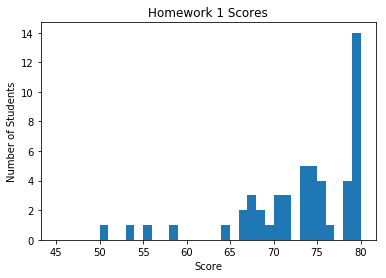

In [162]:
hw1 =[ 80,80,80,80,80,80,80,80,80,80,80,80,
       80,79,78,78,78,78,76,75,75,75,75,74,
       74,74,74,74,73,73,73,73,73,71,71,71,
       70,70,70,69,68.5,68,67,67,67,66.5,66,
       64,58,55,53,50.5]

plt.hist(hw1,bins=range(45,81));
plt.title("Homework 1 Scores")
plt.xlabel("Score")
plt.ylabel("Number of Students");

# Sequences

**Def:** A **sequence** of real numbers is a real valued function on the set $\mathbb{N} = \{ 0, 1, 2, 3, \dots \}$. Sometimes we include $0$ in $\mathbb{N}$, sometimes we don't. It should be clear from context. 

If $X : \mathbb{N} \rightarrow \mathbb{R}$, the sequence of values is referred to by

$$
X(0), X(1), X(2), \dots
$$

Usually, we refer to the elements of the sequence by $x_n = X(n)$ and write

$$
x_0, x_1, x_2, \dots
$$

For example, if $x_n = n^2$, then

$$
X = ( 0, 1, 4, 9, \dots )
$$

In Python we represent sequences as functions that take a single integer $n$ and return the value at that $n$. So that we can manipulate them like sequences, we can wrap them in a `np.array`. So that we can do exact math, we might also use `sympy` to represent the elements of the sequence.

In [180]:
#
# Example: The sequence (n**2 : for n \in N)
#

def x(n):
    return n**2

# As a Python list
X1 = [x(n) for n in range(1,20)]

# As a numpy list
X2 = np.array([x(n) for n in range(1,20)])

# As a numpy list of infinite precesion sympy numbers
X = np.array([x(sm.Integer(n)) for n in range(1,20)])
X1, X2, X

([1,
  4,
  9,
  16,
  25,
  36,
  49,
  64,
  81,
  100,
  121,
  144,
  169,
  196,
  225,
  256,
  289,
  324,
  361],
 array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144, 169,
        196, 225, 256, 289, 324, 361]),
 array([1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256,
        289, 324, 361], dtype=object))

In [185]:
type(X[0]), type(X)

(sympy.core.numbers.One, numpy.ndarray)

In [187]:
#
# Example: The sequence (1/n : for n \in N). This better shows why we might use sympy.
#

def y(n):
    return 1/n

Y = np.array([y(sm.Integer(n)) for n in range(1,20)])
Y

# Y = np.array([y(n) for n in range(1,20)])
# Y

array([1, 1/2, 1/3, 1/4, 1/5, 1/6, 1/7, 1/8, 1/9, 1/10, 1/11, 1/12, 1/13,
       1/14, 1/15, 1/16, 1/17, 1/18, 1/19], dtype=object)

## Combining sequences

If $(x_n)$ and $(y_n)$ represent sequences, the we can construct new sequences by adding, subtracting, multiplying, and dividing them elementwise to get

$$
(x_n + y_n)
$$

$$
(x_n - y_n)
$$

$$
(x_n y_n)
$$

$$
(x_n / y_n)
$$

In [165]:
print(X+Y, "\n")
print(X-Y, "\n")
print(X*Y, "\n")
print(X/Y, "\n")

[2 9/2 28/3 65/4 126/5 217/6 344/7 513/8 730/9 1001/10 1332/11 1729/12
 2198/13 2745/14 3376/15 4097/16 4914/17 5833/18 6860/19] 

[0 7/2 26/3 63/4 124/5 215/6 342/7 511/8 728/9 999/10 1330/11 1727/12
 2196/13 2743/14 3374/15 4095/16 4912/17 5831/18 6858/19] 

[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19] 

[1 8 27 64 125 216 343 512 729 1000 1331 1728 2197 2744 3375 4096 4913
 5832 6859] 



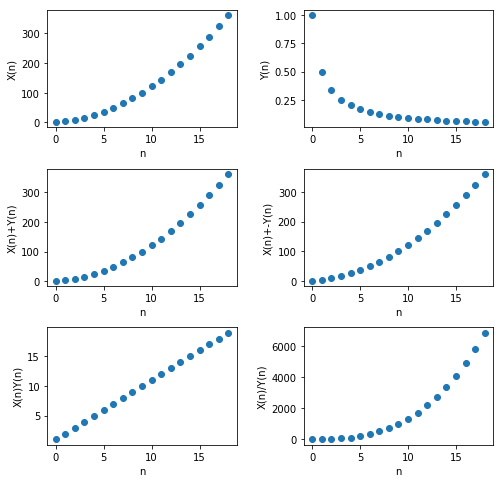

In [166]:
# You can easily visualize a sequence by plotting it.

fig,ax = plt.subplots(3,2, figsize=(8,8))

ax[0,0].plot(X,'o');   ax[0,0].set_xlabel("n"); ax[0,0].set_ylabel("X(n)");
ax[0,1].plot(Y,'o');   ax[0,1].set_xlabel("n"); ax[0,1].set_ylabel("Y(n)");
ax[1,0].plot(X+Y,'o'); ax[1,0].set_xlabel("n"); ax[1,0].set_ylabel("X(n)+Y(n)");
ax[1,1].plot(X-Y,'o'); ax[1,1].set_xlabel("n"); ax[1,1].set_ylabel("X(n)+-Y(n)");
ax[2,0].plot(X*Y,'o'); ax[2,0].set_xlabel("n"); ax[2,0].set_ylabel("X(n)Y(n)");
ax[2,1].plot(X/Y,'o'); ax[2,1].set_xlabel("n"); ax[2,1].set_ylabel("X(n)/Y(n)");
plt.subplots_adjust(hspace=0.35, wspace=0.35)

## Limits of sequences

**Def:** Let $X = (x_n)$ be a sequence. $x$ is a **limit** of $X$ if for every $\varepsilon > 0$ there exists $K(\varepsilon) \in \mathbb{N}$ such that for all $n \geq K(\varepsilon)$, 

  $$
  x - \varepsilon < x_n < x + \varepsilon .
  $$
  
In this case we write $\lim x_n = x$ and say that $x_n$ converges to $x$.
  
**Example:** Show that the limit of the sequence $x_n = \frac{1}{n}$ is 0. 

Suppose $\varepsilon > 0$ is chosen. Then we need 

$$
\frac{1}{n} < \varepsilon .
$$

Multiplying by $n/\varepsilon$ (which is positive) gives

$$
\frac{1}{\varepsilon} < n .
$$

Thus, we choose $K(\varepsilon) = \left \lceil \frac{1}{\varepsilon} \right \rceil$ to satisfy the definition.

An equivalent way to show that a sequence converges to a limit point is to use the following theorem, which can be shown by using the above definition.

**Thm 1:** Let $(a_n)$ and $(x_n)$ be sequences with $\lim a_n = 0$ and let $x \in \mathbb{R}$. If for some $C > 0$ and some $m > 0$ it is the case that

$$
\left |x_n - x \right | \leq C\left |a_n\right |
$$

for all $n > m$, then $\lim x_n = x$. 

**Example:** Show that the limit of the sequence $x_n = \frac{1}{2^n}$ is 0. 

First, note that $0 < n < 2^n$ when $n > 0$. Then, dividing by $n2^n$, 

  $$
  0 < \frac{1}{2^n} < \frac{1}{n}.
  $$
  
Then, subtracting 0 and taking absolute values gives 

  $$
  \left | \frac{1}{2^n} - 0 \right | \leq \frac{1}{n} .
  $$
  
Thus, using the theorem above with $C = 1$ and $m=1$ we can conclude that

$$\lim \frac{1}{2^n} = 0$$ 

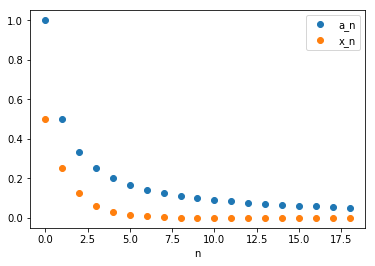

In [167]:
# You can see the above graphically.

A = [1/n for n in range(1,20)]
X = [1/(2**n) for n in range(1,20)]

plt.plot(A,"o",label="a_n")
plt.plot(X,"o",label="x_n")
plt.xlabel("n")
plt.legend();


**Example:** Show that $\lim \frac{1}{1+nr} = 0$ when $r>0$. 

Since $r > 0$,

$$
0 < nr < 1+nr.
$$

Dividing by $nr(1+nr)$ gives

$$
0 < \frac{1}{1+nr} < \frac{1}{nr}
$$

implying that

$$
\left | \frac{1}{1+nr} \right | \leq \frac{1}{r} \left | \frac{1}{n} \right |.
$$

Thus, the theorem above applies with $C = \frac{1}{r}$ and $m = 1$.


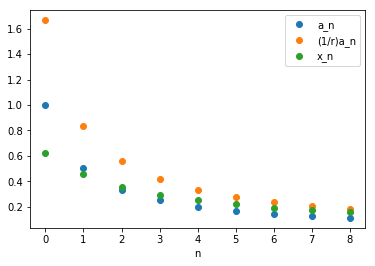

In [168]:
# You can see the above graphically.

r = 0.6
A = [1/n for n in range(1,10)]
X = [1/(1 + r*n) for n in range(1,10)]

plt.plot(A,"o",label="a_n")
plt.plot((1/r)*np.array(A),"o",label="(1/r)a_n")
plt.plot(X,"o",label="x_n")
plt.xlabel("n")
plt.legend();

## Limits of Combined sequences

**Thm 2:** If $\lim x_n = L$ and $\lim y_n = M$ then 

$$
\lim x_n + y_n = L + M
$$

$$
\lim a x_n = a L
$$

$$
\lim x_n y_n = L M
$$

and when $y_n \neq 0$,

$$
\lim \frac{x_n}{y_n} = \frac{L}{M}.
$$

**Proof:** For $\lim x_n + y_n = L + M$, note that by the [triangle inequality](https://en.wikipedia.org/wiki/Triangle_inequality),

\begin{eqnarray}
\left | (x_n + y_n ) - ( L+M ) \right | & = & \left | (x_n-L) + (y_n - M) \right | \\
                                        & \leq & \left |(x_n - L) \right | + \left |(y_n - M ) \right |, 
\end{eqnarray}

If $\varepsilon > 0$ is given, then there exist natural numbers $K_1$ and $K_2$ such that if $n > \max(K_1,K_2)$ then 

$$\left |(x_n - L) \right | < \frac{\varepsilon}{2}$$

and

$$\left |(y_n - M) \right | < \frac{\varepsilon}{2}$$

so that 

$$
\left |(x_n - L) \right | + \left |(y_n - M ) \right | < \frac{\varepsilon}{2} + \frac{\varepsilon}{2} = \varepsilon .
$$

The other properties are demonstrated similarly.

&square;

**Example**: $\lim \frac{1}{n} + \frac{1}{2^n} = 0$.

# Limits of Functions



**Def:** Let $f : A \rightarrow \mathbb{R}$ and $c \in A$ be a cluster point (which we won't define here, but it is just non-isolated point). Then

$$
\lim_{x \rightarrow c} f(x) = L
$$

if and only if for every $\varepsilon > 0$, there exists a $\delta > 0$ such that if $x \in A$ and

$$0 < |x-c| < \delta$$

then 

$$|f(x)-L| < \epsilon. $$

**Example:** Show $\lim_{x \rightarrow c} x = c$. 

Given $\varepsilon$ simply choose $\delta = \varepsilon$. Then 

$$
0 < |x-c| < \varepsilon
$$

is equivalent to 

$$
0 < |x-c| < \delta .
$$

<hr>

The following is an alternative way to define the limit. It is shown here as a theorem, meaning that you can prove it by assume the definition above of a limit. Or you can 

**Thm 3:** Let $f:A \rightarrow \mathbb{N}$. Then $\lim_{x \rightarrow c} f(x) = L$ if and only if for every sequence $(x_n) \in A$ that converges to $c$ such that $x_n \neq c$, the sequence $f(x_n)$ converges to $L$.

One use of this theorem to show a limit does *not* exist, we have to find just one sequence that does not satisfy the above property. 

**Example**: $\lim_{x \rightarrow 0} \frac{1}{x}$ does not exist. 

To show this, let $x_n = 1/n$. We have already shown this sequence converges to $0$, which is also is not one of the elements of the sequence. However, if $f(n) = \frac{1}{x}$ then $f(x_n) = 1 / ( 1 / n ) = n$, which does not converge.

<hr>

The above theorem can also be used to show the various formulas about limits we use all the time.

**Thm 4:** Say $\lim_{x \rightarrow c}f(x) = L$ and $\lim_{x \rightarrow c}f(x) = M$, then

$$
\lim_{x \rightarrow c}f(x) + g(x) = L + M
$$

$$
\lim_{x \rightarrow c} a f(x) = a L
$$

$$
\lim_{x \rightarrow c}f(x) g(x) = L M
$$

and, when $M \neq 0$, 

$$
\lim_{x \rightarrow c}f(x) / g(x) = L / M .
$$

**Proof:** Let $x_n$ be any sequence that converges to $c$ but does not contain $c$. Then by Thm 3, $\lim f(x_n) = L$ and $\lim g(x_n) = M$. Thus, by Thm 2, $\lim f(x_n) + g(x_n) = L+M$. Similar arguments hold for the remaining statements. &square;

**Example:** $\lim_{x \rightarrow 1} \frac{x^2 + 2}{x^3 + 1} = \frac{3}{2}.$

In general, limits of polynomials and quotients of polynomials can be computed this way.



## Limits with Sympy

In [171]:
x = sm.symbols("x")

sm.limit((x**2 + 2)/(x**2+1),x,1)

3/2

In [172]:
sm.limit(x**(3/2),x,0)

0

# Continuous Functions

**Def:** A function $f : A \rightarrow \mathbb{R}$ is continuous at $c$ if and only if for any $\varepsilon$ there exists $\delta$ such that for all $x \in A$, if $|x-c| < \delta$ then $|f(x) - f(c)| < \varepsilon$.

**Equivalent Def:** A function $f : A \rightarrow \mathbb{R}$ is continuous if and only if 

$$
f(c) = \lim_{x \rightarrow c} f(x)
$$

**Example:** If $f(x) = x$, then $\lim_{x \rightarrow c} f(x) = c$. Also, $f(c) = c$. Thus, $f(x)$ is continuous at all points $c$. 

<hr>

**Example:** If $f(x) = 1/x$ then if $c > 0$,  $\lim_{x \rightarrow c} f(x) = 1/c$. Also, $f(c) = 1/c$. So $f(x)$ is continuous at points $c > 0$. 

<hr>

**Equivalent Def:** A function $f : A \rightarrow \mathbb{R}$ is continuous at $c$ if and only if for any sequence $(x_n)$ that converges to a value $c$, the sequence $(f(x_n))$ converges to $f(c)$. That is,

$$
\lim x_n = c \Rightarrow \lim f(x_n) = f(c) .
$$

**Non-Convergence Criterion:** Find *some* sequence $(x_n)$ that converges to $c$ where $f(x_n)$ does not converge to $f(c)$. 

**Example:** $f(x) = 1/x$ is not continuous at $0$. To see this, let $(x_n)$ be defined by $x_n = 1/n$. Then as we have shown, $\lim x_n = 0$. However, the sequence $(f(x_n)) = 1/(1/n) = n$ does not converge. 

<hr>

**Example:** Dirichlet's Function (1829). Define $f$ by

$$
f(x) = \left \{
\begin{array}{ll}
1 & \mathrm{if}\;x\;\mathrm{is\;rational} \\
0 & \mathrm{otherwise}. 
\end{array}
\right .
$$

Then $f$ is discontinuous everywhere. 

It turns out a fundamental property of the real numbers is the following. If $x<y$, then there exists a rational number $z$ with $x<z<y$. In addition, there exists an irrational number $w$ with $x<w<y$. 

Thus, if $c$ is rational, we can come up with an irrational sequence $(z_n)$ that converges to $c$. Then $f(c) = 1$ but $(f(z_n)) = 0$. 

Conversely, if $c$ is irrational, choose a sequence $(w_n)$ of rational numbers that converges to $c$. 

<hr>

**Example:** Thomae's Function (1875). Define $f(x)$ as follows. If $x$ is irrational, then $f(x) = 0$. If $x$ is rational, then express it in reduced form (no common factors) as $m/n$. Then define $f(m/n) = 1/n$. This is plotted below.

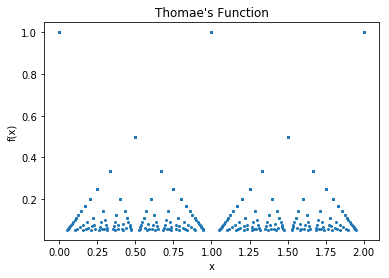

In [173]:
x = []
y = []

for den in range(1,20):
    for num in range(0,2*den+1):
        x.append(num/den)
        # Note that sympy's Rational function automatically reduces. Also, you can
        # get the numerator and denominator with the .p and .q attributes. 
        y.append(sm.Rational(1,sm.Rational(num,den).q))
plt.plot(x,y,'o',markersize=2)
plt.title("Thomae's Function")
plt.xlabel("x")
plt.ylabel("f(x)");

This function is discontinuous at rational numbers, but continuous at irrational numbers. 

If $c$ is rational, we can come up with an irrational sequence $(z_n)$ that converges to $c$. Then $f(c) = 1$ but $(f(z_n)) = 0$. 

However, if $c$ is irrational, then choose any $\epsilon > 0$. Then there is some $n_0 \in \mathbb{N}$ such that $1/n_0 < \epsilon$. There are only a finite number of rationals with denominator less than $n_0$ in $(c-1, c+1)$ (because there are only a finite number of possible denominators, and for each of those a finite number of numerators). Thus, $\delta$ can be chosen so that if $(c-\delta, c+\delta)$ contains no rational numbers whose denominators are less than $n_0$. So if $|x-c| < \delta$ then $|h(x) - h(c)| = |h(x)| < 1/n_0 < \epsilon$. The last inequality comes from the fact that if $x$ is in $(c-\delta, c+\delta)$ it must have a denominator greater than $n_0$.

## Combinations of Continuous Functions

Because of the combinations for limits, combinations $f+g$, $fg$, $f-g$, and $f/g$ of continuous functions $f$ and $g$ are also continuous. In addition, $f \circ g$ is continuous if $f$ and $g$ are.

## Intermediate Value Theorem

**Thm 5:** Let $I$ be an interval in $\mathbb{R}$ and suppose $f : I \rightarrow \mathbb{R}$ is continuous at all points in $I$. If $a,b \in I$ and $a<b$ and if $k \in \mathbb{R}$ and $f(a) < k < f(b)$ then there exists a point $c \in I$ with $f(c) = k$. 

The proof follows from the definition of *continuous*.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Illustration_for_the_intermediate_value_theorem.svg/1200px-Illustration_for_the_intermediate_value_theorem.svg.png" width=300>

![](https://study.com/cimages/multimages/16/intermediate-value-theorem-two.jpg)

**Example:** Say $f(x) = x^2 - 2$, $a = 1$, and $b = 2$. Then $f(a) = -1$ and $f(b) = 2$. Since $-1 < 0 < 2$, it must be the case that there exists $c$ with $-1<c<2$ with $f(c) = c^2 - 2 = 0$. That is $c = \sqrt{2}$. 

Interesting consequences:

- If a four legged table is not resting flat, it will if you rotate it.
- If you take a long, round trip walk in the hills, then at some point other than where you started, you will be at the same height as where you started (assuming you don't start at the lowest or highest point). 
- Same applies to pressure, temperature, etc.

# Differentiation

**Def:** If $f:I \mathbb{R}$ function $c \in I$, then the derivative $f'$ of $f$ is defined by 

$$
f'(c) = \lim_{x \rightarrow c} \frac{f(x) - f(c)}{x-c}. 
$$

assuming this limit exists. 

**Example:** Say $f(x) = x^2$. Then

\begin{eqnarray}
f'(c) & = & \lim_{x \rightarrow c} \frac{x^2 - c^2}{x-c}  \\
      & = & \lim_{x \rightarrow c} x+c = 2c
\end{eqnarray}

Thus, $f'(x) = 2x$. 

<hr>

**Thm 6:** If $f$ has a derivative at $c$ then $f$ is continous at $c$. 

**Proof:** We have

$$
f(x) - f(c) = \left ( \frac{f(x)-f(c)}{x-c} \right ) (x-c) \\
$$

Taking limits gives and using the product rule for limits gives

\begin{eqnarray}
\lim_{x \rightarrow c} (f(x)-f(c)) & = & \left ( \lim_{x \rightarrow c}\frac{f(x)-f(c)}{x-c} \right ) (\lim_{x \rightarrow c} (x-c) ) \\
 & = & f'(c) \cdot 0 .
\end{eqnarray}

Thus, $\lim_{x \rightarrow c} = f(c)$.

&square;

**Note:** The converse is not true! Weierstrauss showed in 1872 that

$$f(x) = \sum_{n=0}^\infty \frac{1}{2^n} \cos(3^n x)$$

is continuous at every point, but does not have a derivative at any point (look up this result for the proof).

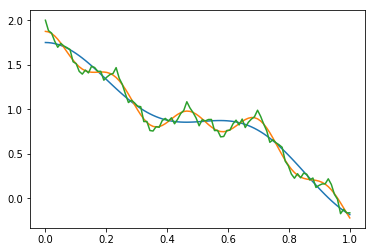

In [174]:
x = np.linspace(0,1,100)
f10 = sum([1/(2**n)*np.cos(3**n * x) for n in range(3)])
f20 = sum([1/(2**n)*np.cos(3**n * x) for n in range(4)])
f30 = sum([1/(2**n)*np.cos(3**n * x) for n in range(16)])
plt.plot(x,f10,x,f20,x,f30);

## Combinations of Derivatives

**Thm 6:** If $f$ and $g$ are continuous at %c% then

$$
(af)'(x) = a f'(x)
$$

$$
(f+g)'(x) = f'(x) + g'(x)
$$

$$
(fg)'(x) = f'(x)g(x) + f(x)g'(x)
$$

$$
\left (\frac{f}{g} \right)'(x) = \frac{f'(x)g(x) - f(x)g'(x)}{(g(x))^2}.
$$

**Example Proof of 3rd part:** Let $p = fg$. Then

\begin{eqnarray}
\frac{p(x) - p(c)}{x-c} & = & \frac{f(x)g(x) - f(c)g(c)}{x-c} \\
  & = & \frac{f(x)g(x) - f(c)g(x) + f(c)g(x) - f(c)g(c)}{x-c} \\
  & = & \frac{f(x)-f(c)}{x-c} g(x) + f(c) \frac{g(x)-g(c)}{x-c}
\end{eqnarray}

Taking limits and noting that since $f$ and $g$ are continuous, the limits above equal $f(c)$ and $g(c)$ gives the desired result.

In [175]:
# For example

x = sm.symbols("x")

f = x**2 + 1
g = sm.exp(x)

(sm.diff(f,x)*g + f*sm.diff(g,x)), sm.diff(f*g,x)

⎛     x   ⎛ 2    ⎞  x       x   ⎛ 2    ⎞  x⎞
⎝2⋅x⋅ℯ  + ⎝x  + 1⎠⋅ℯ , 2⋅x⋅ℯ  + ⎝x  + 1⎠⋅ℯ ⎠

Note that the product rule extends to arbitrary length sums, so that

$$
(f_1 f_2 ... + f_n)'(x) = f_1'(x)f_2(x)...f_n(x) + f_n(x)f_2'(x)...f_n(x) + ... + f_n(x)f_2(x)...f_n'(x).
$$

Even better, if $f_i = f$ then,

$$
(f^n)'(x) = n f'(x)f(x)^{n-1}.
$$

And finally, if $f(x) = x^n$ then,

$$
\frac{d}{dx} x^n = n x^{n-1}. 
$$

Cool!

In [176]:
sm.diff(x**1000,x)

      999
1000⋅x   

## The chain rule

Since

$$
\frac{g(f(x)) - g(f(c))}{x-c} = 
\frac{g(f(x)) - g(f(c))}{f(x)-f(c)} \cdot \frac{f(x) - f(c)}{x-c}
$$

we get that

$$
(g \circ f)'(x) = g'(f(x)) \cdot f'(x).
$$

In [177]:
# For example

x = sm.symbols("x")

f = x**2 + 1
g = sm.exp(x)
gof = g.subs(x,f)

df = sm.diff(f,x)
dg = sm.diff(g,x)
dgof = dg.subs(x,f)*df

f, g, df, dg, gof, dgof, sm.diff(gof), 

⎛                       2            2            2    ⎞
⎜ 2       x        x   x  + 1       x  + 1       x  + 1⎟
⎝x  + 1, ℯ , 2⋅x, ℯ , ℯ      , 2⋅x⋅ℯ      , 2⋅x⋅ℯ      ⎠

## L'Hospital's Rule (0/0) case

**Thm 8:** If $f$ and $g$ are differentiable at $a$ and $f(a) = g(a) = 0$ then

$$
\lim_{x \rightarrow a} \frac{f(x)}{g(x)} = \frac{f'(x)}{g'(x)}.
$$

**Proof:** Since $f(a) = g(a) = 0$,
$$
\frac{f(x)}{g(x)} = \frac{f(x) -f(a)}{g(x)-g(a)} = \frac{
\frac{f(x) -f(a)}{x-a}
}{
\frac{g(x) -g(a)}{x-a}
} .
$$
&square;

Note: You get to come up with examples in homework. 

Note: We have to have $f(a) = g(a) = 0$. For example, 

$$
\lim_{x \rightarrow 0} \frac{x+17}{2x+3} = \frac{17}{3}
$$

but

$$
\lim_{x \rightarrow 0} \frac{1}{2} = \frac{1}{2} .
$$


## The Mean Value Theorem

**Thm 7:** If $f : [a,b] \rightarrow \mathbb{reals}$ is continuous and has a derivative on $(a,b)$, then there is at least one point $c \in (a,b)$ such that

$$
f(b) - f(a) = f'(c)(b-a) .
$$

We will not prove this here. See the reading.

This theorem means that there is one point on the curve $y=f(x)$ at which the tangent line is parallel to the line from $(a,f(a))$ to $(b,f(b))$. 

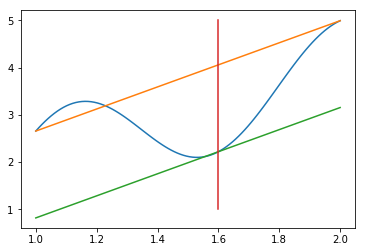

In [178]:
x = np.linspace(1, 2,100);
f = 2*x + np.sin(7*x)
fa = f[0]
fb = f[-1]
c = 1.6
fc = 2*c + np.sin(7*c)
plt.plot(
    x,2*x + np.sin(7*x),
    x,(fb-fa)/(2-1)*(x-2)+fb,
    x,(fb-fa)/(2-1)*(x-c)+fc) 
plt.plot([c,c],[1,5])

## Example: Finding square roots

**Example:** Find an approximation to $\sqrt(105)$. 

Set $f(x) = \sqrt{x}$. Then the MVT says that for some $c \in (a,b)$

$$
f(b) - f(a) = \frac{1}{2 \sqrt{c}} (b-a)
$$

Choosing $a=100$ and $b=105$ we get that

$$
\sqrt(105) - sqrt(100) = \frac{5}{2 \sqrt{c}} 
$$

with $100 < c < 105$. Taking square roots gives $10 < \sqrt{c} < \sqrt{105}$. And since
$\sqrt{105} < \sqrt{121} = 11$ we get 

$$
10 < \sqrt{c} < 11
$$

so that

$$
\frac{5}{2\cdot 11} < \sqrt{105} - 10 < \frac{5}{2 \cdot 10}
$$

or $10.2272 < \sqrt{105} < 10.2500$.

## Example: Inequalities

**Example:** Show that $e^x \geq 1+x$ for $x \geq 0$. 

For $x = 0$ we get equality. So suppose $x>0$ and consider the interval [0,x]$. Then by the MVT

$$
e^x - e^0 = e^c (x-0)
$$

for some $c$ with $0 < c < 1$. Since $e^0 = 1$ and $e^c > 1$ we get the result.

# Taylor's Theorem

Taylor's theorem can be regarded as an extension of the MVT for higher derivatives. It states:

**Thm 9:** Say $f:I \rightarrow \mathbb{R}$is continuous and so are all of its derivatives. If $x_0 \in I$, then 

$$
f(x) = f(x_0) + f'(x_0)(x-x_0) + \frac{f''(x_0)}{2!}(x-x_0)^2 + ... 
     + \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n
     + ... 
$$

If an approximation is desired, then you can use

$$
f(x) = f(x_0) + f'(x_0)(x-x_0) + \frac{f''(x_0)}{2!}(x-x_0)^2 + ... 
     + \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n
     + \frac{f^{(n+1)}(c)}{(n+1)!}(x-x_0)^{n+1}
$$

for some $c$ with $x < c < x_0$. 

Taylor's theorem has many applications. We will return to it over and over. Some of the cooler observations are as follows.



**Example:** $e^x$

Note that all derivatives of $e^x$ are $e^x$. To find $e$ itself we can take $x_0 = 0$ and use

$$
e^x = e^0 + e^0 x + e^0 \frac{x^2}{2!} + e^0 \frac{x^3}{3!} + ...
$$

Simplifying, 

$$
e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + ...
$$

If you take this as a definition of $e^x$ then you can actually see why $\frac{d}{dx}e^x = e^x$ since

\begin{eqnarray}
\frac{d}{dx}e^x & = & \frac{d}{dx} \left ( 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + ... \right ) \\
                & = & 0 + 1 + 2 \frac{x}{2!} + 3 \frac{x^2}{3!} + ... \\
                & = & e^x. 
\end{eqnarray}

<hr>

You can also make approximations to $e$ using the above.

**Example:** Find $e$ with error less than $10^{-5}$. 

Taking $x=0$ and $x_0 = 1$ in Taylor's Theorem, the remainder is $\frac{e^c}{(n+1)!}$ for some $c$ with $0 < c < 1$. Since we know that $e^c < 3$ we want $n$ so that 

$$
\frac{e^c}{(n+1)!} < \frac{e^1}{(n+1)!} < \frac{3}{(n+1)!} < 10^{-5}.
$$

or 

$$
(n+1)! > 3 \cdot 10^{5} = 300000.
$$

Since $9! = 362880$ but $8! = 40320$, we can take $n \geq 9$. Then,

$$
e \approx 1 + 1 + \frac{1}{2!} + ... + \frac{1}{8!} = 2.71827876984127 ...
$$


In [179]:
ep = sum([1/math.factorial(n) for n in range(9)])
ep, math.e, abs(ep - math.e) < 10**(-5)

(2.71827876984127, 2.718281828459045, True)

# Conclusion

![](https://3.bp.blogspot.com/-CAihtz6xvGw/WfYt5Wm4l7I/AAAAAAAAKIw/5siM_rslPfwIGP8I6XfrAatWz8ZvoxOqwCLcBGAs/s1600/i-thought-you-were-smart1.gif)